## Min Max on Tic Tac Toe

### Game configuration

In [3]:
import numpy as np

In [4]:

## Regras: 
## - . (ponto)    -> representa um campo vazio
## - x (xis)      -> representa o jogador 1
## - o (bolinha)  -> representa o jogador 2


def action(board, player, position):
    if not player in ['o', 'x']:
        raise 'O player deve ser "o" ou "x"'
    elif not isinstance(position, tuple):
        raise 'A posição deve ser uma tupla'
        
        
    if board[position] == '.':
        board[position] = player
    
    return board

In [5]:
# Correção da função check_winner
def check_winner(board):
    global tape_player_g
    for player, tape_player in zip(['x', 'o'], [np.asarray(['x']*board.shape[0]), np.asarray(['o']*board.shape[0])]):
        tape_player_g = tape_player
        # Horizontal
        for i in range(board.shape[0]):
            if (board[i, :] == tape_player).all():
                return player

        # Vertical
        for i in range(board.shape[0]):
            if (board[:, i] == tape_player).all():
                return player
            
        # Diagonal principal
        if (np.asarray([board[i][j] for i, j in [(0,0), (1,1), (2,2)]]) == tape_player).all():
            return player
        
        # Diagonal secundária
        if (np.asarray([board[i][j] for i, j in [(0,2), (1,1), (2,0)]]) == tape_player).all():
            return player
        
    # Verifica se ainda há jogadas possíveis ou se o jogo empatou
    if (board == '.').any():
        return '.'
    else:
        return None  # Empate


In [6]:
def check_if_there_is_still_game(board):
    if (board == '.').any():
        return True


In [7]:
def mostrar_tabuleiro(tabuleiro):
    # Mostra a matriz do jogo
    for row in tabuleiro:
        print("|".join(row))
        print("-" * 5)  # linha separadora

### Min Max Code

In [1]:
# import numpy as np

# Funções fornecidas anteriormente:
tape_player_g = ''
# ... [as funções check_winner, action, check_if_there_is_still_game e mostrar_tabuleiro que você forneceu]

count_nodes = 0
def minmax(board, depth, is_maximizing, alpha, beta):
    global count_nodes
    count_nodes += 1
    winner = check_winner(board)
    if winner == 'x':
        return -10 + depth
    elif winner == 'o':
        return 10 - depth
    elif winner is None:
        return 0

    
    if is_maximizing:
        best_score = float('-inf')
        for i in range(3):
            for j in range(3):
                if board[i, j] == '.':
                    new_board = action(board.copy(), 'o', (i, j))
                    score = minmax(new_board, depth + 1, False, alpha, beta)
                    best_score = max(best_score, score)
                    
                    alpha = max(alpha, best_score)
                    if beta <= alpha:
                        return best_score  # poda
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i, j] == '.':
                    new_board = action(board.copy(), 'x', (i, j))
                    score = minmax(new_board, depth + 1, True, alpha, beta)
                    best_score = min(best_score, score)
                    
                    beta = min(beta, best_score)
                    if beta <= alpha:
                        return best_score  # poda
        return best_score

def best_move(board):
    global count_nodes
    best_score = float('-inf')
    move = (-1, -1)
    alpha = float('-inf')
    beta = float('inf')
    count_nodes = 0
    for i in range(3):
        for j in range(3):
            if board[i, j] == '.':
                new_board = action(board.copy(), 'o', (i, j))
                score = minmax(new_board, 0, False, alpha, beta)
                if score > best_score:
                    best_score = score
                    move = (i, j)
                    
                alpha = max(alpha, best_score)
    return move, count_nodes

### Min Max Without Alpha & Beta

In [83]:
import numpy as np

# Assuming the other functions (check_winner, action, etc.) are still available...

count_nodes = 0

def minmax(board, depth, is_maximizing, alpha, beta, use_alpha_beta=True):
    global count_nodes
    count_nodes += 1
    winner = check_winner(board)
    if winner == 'x':
        return -10 + depth
    elif winner == 'o':
        return 10 - depth
    elif winner is None:
        return 0

    if is_maximizing:
        best_score = float('-inf')
        for i in range(3):
            for j in range(3):
                if board[i, j] == '.':
                    new_board = action(board.copy(), 'o', (i, j))
                    score = minmax(new_board, depth + 1, False, alpha, beta, use_alpha_beta)
                    best_score = max(best_score, score)
                    if use_alpha_beta:
                        alpha = max(alpha, best_score)
                        if beta <= alpha:
                            return best_score
        return best_score
    else:
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i, j] == '.':
                    new_board = action(board.copy(), 'x', (i, j))
                    score = minmax(new_board, depth + 1, True, alpha, beta, use_alpha_beta)
                    best_score = min(best_score, score)
                    if use_alpha_beta:
                        beta = min(beta, best_score)
                        if beta <= alpha:
                            return best_score
        return best_score

def best_move(board, use_alpha_beta=True):
    global count_nodes
    best_score = float('-inf')
    move = (-1, -1)
    count_nodes = 0
    alpha, beta = float('-inf'), float('inf')
    for i in range(3):
        for j in range(3):
            if board[i, j] == '.':
                new_board = action(board.copy(), 'o', (i, j))
                score = minmax(new_board, 0, False, alpha, beta, use_alpha_beta)
                
                if score > best_score:
                    best_score = score
                    move = (i, j)
                    
                if use_alpha_beta:
                    alpha = max(alpha, best_score)
                
                
    return move, count_nodes


### Código Jogador vs CPU

In [84]:


def play_game():
    board = np.asarray([['.', '.', '.'],
                        ['.', '.', '.'],
                        ['.', '.', '.']])
    current_player = 'x'  # Você começa jogando
    
    while check_winner(board) == '.' and check_if_there_is_still_game(board):
        mostrar_tabuleiro(board)
        if current_player == 'x':
            row, col = map(int, input("Digite a linha e coluna (0-2) separados por espaço: ").split())
            if board[row, col] == '.':
                board = action(board, current_player, (row, col))
                current_player = 'o'
            else:
                print("Posição inválida! Tente novamente.")
        else:
            print("Turno da IA!")
            move = best_move(board)
            board = action(board, current_player, move)
            current_player = 'x'
            
    mostrar_tabuleiro(board)
    winner = check_winner(board)
    if winner == 'x':
        print("Parabéns! Você ganhou!")
    elif winner == 'o':
        print("A IA ganhou!")
    else:
        print("Empate!")

# Inicia o jogo:
play_game()


.|.|.
-----
.|.|.
-----
.|.|.
-----


KeyboardInterrupt: Interrupted by user

### Código CPU vs CPU

In [85]:
import pandas as pd

In [86]:
df_frequencia_posicoes = pd.DataFrame()
df_logs_finais = pd.DataFrame()

In [115]:
# Funções anteriormente definidas (check_winner, action, mostrar_tabuleiro, minmax, best_move)

import time
import random

def cpu_vs_cpu(use_alpha_beta=True):
    board = np.array([
        ['.', '.', '.'],
        ['.', '.', '.'],
        ['.', '.', '.']
    ])
    begin_time = time.time()
    move, nodes = best_move(board, use_alpha_beta)
    end_time = time.time()
    time_rounds = [end_time-begin_time]
    initial_position = random.randint(0, 8)
    x,y = ( (initial_position % 3), (initial_position // 3) )
    board[x][y] = 'x'
    current_player = 'o'  # Começamos com o jogador 'x'
   
    rnds = [0]
    rnd = 1
    moviments = [initial_position]
    player_moviments = ['x']
    
    nodes_discovered = [nodes]
    
    while check_winner(board) == '.':
        begin_time = time.time()
        #mostrar_tabuleiro(board)
        #print(f"Turno do jogador {current_player}!")
            
        move, nodes = best_move(board, use_alpha_beta)
     
        if move == (-1, -1):  # Isso não deveria acontecer, mas é uma verificação de segurança
            #print("Empate!")
            break

        board = action(board, current_player, move)
        player_moviments.append(current_player)
        # Alterna entre os jogadores
        current_player = 'o' if current_player == 'x' else 'x'
        end_time = time.time()
        time_rounds.append(end_time-begin_time)
        rnds.append(rnd)
        moviments.append((move[0]*3 + move[1]))
        rnd+=1
        #time.sleep(2)
        nodes_discovered.append(nodes)
    #mostrar_tabuleiro(board)
    winner = check_winner(board)
    
    status=''
    if winner == None:
        #print("É um empate!")
        status = 'EMPATE'
    else:
        #print(f"O jogador {winner} vence!")
        status = 'VITORIA'
    
    json_logs = {
        'STATUS': [status],
        'GANHADOR': [winner],
        'TABULEIRO': [board],
        'INITIAL_POSITION': [initial_position],
        'NODES_DISCOVERE': sum(nodes_discovered)
    }
    for idx, t in enumerate(time_rounds):
        json_logs['TIME_ROUND_{}'.format(idx+1)] = t
    
    
#     print(len(moviments))
#     print(len(rnds))
#     print(len(player_moviments))
#     print(len(nodes_discovered))
    
    df_logs = pd.DataFrame(json_logs)
    df_frequencia = pd.DataFrame({
            'POSITION_XY':  moviments,
            'ROUND': rnds,
            'PLAYER_TURN': player_moviments,
            'NODES_DISCOVERE': nodes_discovered
        })
    return (df_logs, df_frequencia)

#cpu_vs_cpu()

In [117]:
df_logs, df_frequencia = cpu_vs_cpu()

In [119]:
df_logs

,STATUS,GANHADOR,TABULEIRO,INITIAL_POSITION,NODES_DISCOVERE,TIME_ROUND_1,TIME_ROUND_2,TIME_ROUND_3,TIME_ROUND_4,TIME_ROUND_5,TIME_ROUND_6,TIME_ROUND_7,TIME_ROUND_8,TIME_ROUND_9
0,EMPATE,None,"[[o, x, o], [x, o, x], [x, o, x]]",3,25666,1.706441,0.261037,0.091,0.036004,0.005001,0.002,0.000999,0.0,0.0


### Realização de vários experimentos CPU vs CPU

In [146]:
df_logs = pd.DataFrame()
df_frequencia = pd.DataFrame()

for i in range(50):
    print(f'Jogo: {i}')
    df_lgs, df_freq = cpu_vs_cpu(False)
    df_lgs['GAME'] = i
    df_freq['GAME'] = i
    
    df_logs = pd.concat([df_logs, df_lgs])
    df_frequencia = pd.concat([df_frequencia, df_freq])

Jogo: 0
Jogo: 1
Jogo: 2
Jogo: 3
Jogo: 4
Jogo: 5
Jogo: 6
Jogo: 7
Jogo: 8
Jogo: 9
Jogo: 10
Jogo: 11
Jogo: 12
Jogo: 13
Jogo: 14
Jogo: 15
Jogo: 16
Jogo: 17
Jogo: 18
Jogo: 19
Jogo: 20
Jogo: 21
Jogo: 22
Jogo: 23
Jogo: 24
Jogo: 25
Jogo: 26
Jogo: 27
Jogo: 28
Jogo: 29
Jogo: 30
Jogo: 31
Jogo: 32
Jogo: 33
Jogo: 34
Jogo: 35
Jogo: 36
Jogo: 37
Jogo: 38
Jogo: 39
Jogo: 40
Jogo: 41
Jogo: 42
Jogo: 43
Jogo: 44
Jogo: 45
Jogo: 46
Jogo: 47
Jogo: 48
Jogo: 49


### Visualizações dos dados colhidos anteriormente

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando dados
jogadas_df = df_frequencia
resultados_df = df_logs

# Configurando o estilo dos gráficos
sns.set_style("whitegrid")


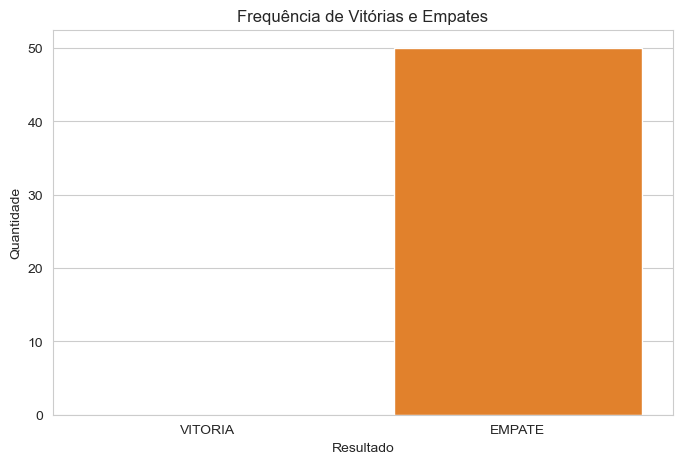

In [148]:
plt.figure(figsize=(8, 5))
sns.countplot(data=resultados_df, x='STATUS', order=['VITORIA', 'EMPATE'])
plt.title('Frequência de Vitórias e Empates')
plt.xlabel('Resultado')
plt.ylabel('Quantidade')
plt.show()


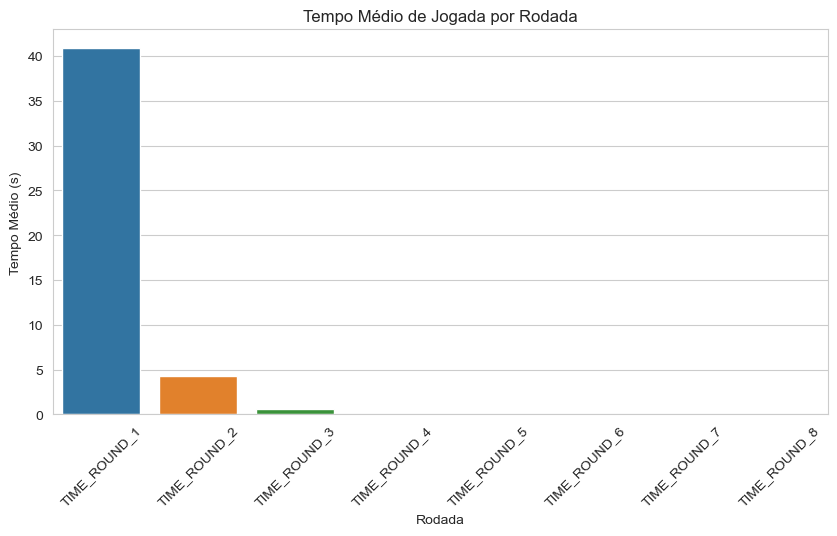

<Figure size 640x480 with 0 Axes>

In [159]:
time_columns = [f"TIME_ROUND_{i}" for i in range(1, 9)]
average_times = resultados_df[time_columns].mean()


    
plt.figure(figsize=(10, 5))
sns.barplot(x=average_times.index, y=average_times.values)
plt.title('Tempo Médio de Jogada por Rodada')
plt.xlabel('Rodada')
plt.ylabel('Tempo Médio (s)')
plt.xticks(rotation=45)

plt.savefig("graphs/Tempo Médio de Jogada por Rodada.png", dpi=500)

plt.show()
plt.savefig("graphs/without_alpha_beta/Tempo Médio de Jogada por Rodada.png", dpi=500)

plt.show()


In [150]:
df_frequencia.columns

Index(['POSITION_XY', 'ROUND', 'PLAYER_TURN', 'NODES_DISCOVERE', 'GAME'], dtype='object')

In [151]:
df_frequencia.groupby('ROUND')['NODES_DISCOVERE'].mean()

ROUND
0    549945.00
1     60544.00
2      7506.76
3      1157.24
4       207.32
5        56.00
6        12.04
7         4.00
8         1.00
Name: NODES_DISCOVERE, dtype: float64

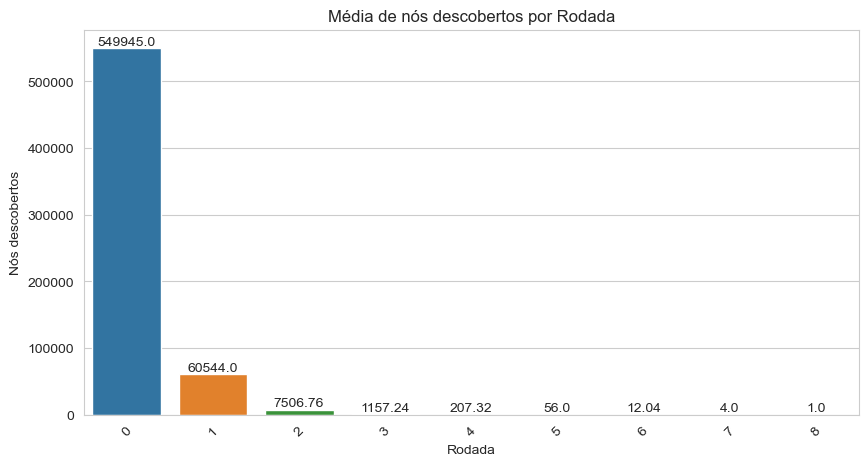

In [152]:
average_nodes_discovered = df_frequencia.groupby('ROUND')['NODES_DISCOVERE'].mean()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=average_nodes_discovered.index, y=average_nodes_discovered.values)
plt.title('Média de nós descobertos por Rodada')
plt.xlabel('Rodada')
plt.ylabel('Nós descobertos')
plt.xticks(rotation=45)

# Adicionando os valores em cima das barras
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, # Posição x do texto (centro da barra)
        bar.get_height() + 0.5, # Posição y do texto (acima da barra)
        round(bar.get_height(), 2), # Valor da barra (arredondado para duas casas decimais)
        ha='center', # Alinha horizontalmente ao centro
        va='bottom'  # Alinha verticalmente por baixo
    )

plt.savefig("graphs/without_alpha_beta/Média de nós descobertos por Rodada.png", dpi=500)

plt.show()

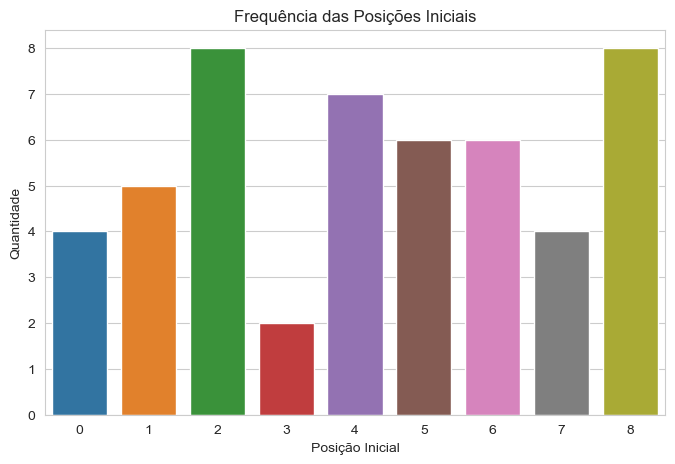

In [153]:
plt.figure(figsize=(8, 5))
sns.countplot(data=resultados_df, x='INITIAL_POSITION')
plt.title('Frequência das Posições Iniciais')
plt.xlabel('Posição Inicial')
plt.ylabel('Quantidade')
plt.savefig("graphs/without_alpha_beta/Frequência das Posições Iniciais=.png", dpi=500)
plt.show()


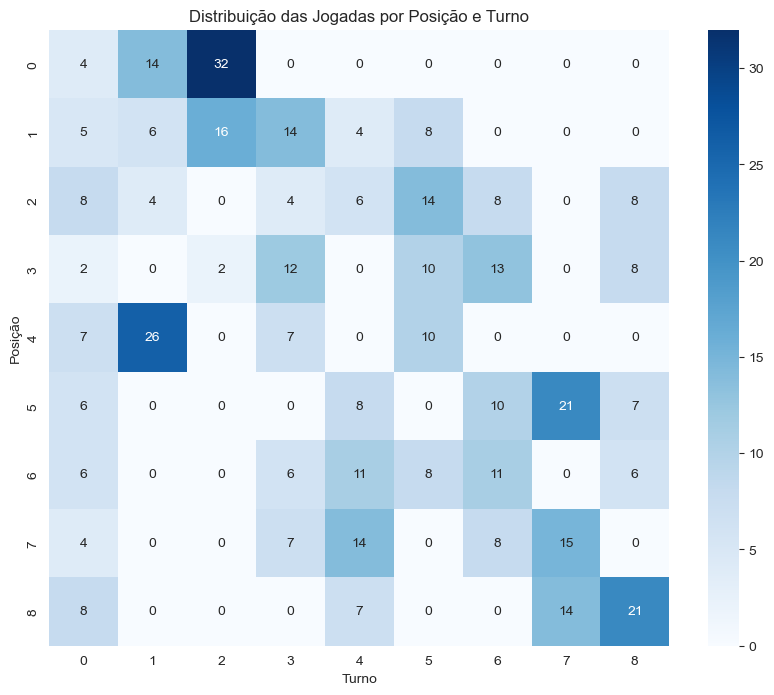

In [154]:
pivot_table = jogadas_df.pivot_table(index='POSITION_XY', columns='ROUND', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Distribuição das Jogadas por Posição e Turno')
plt.xlabel('Turno')
plt.ylabel('Posição')
plt.savefig("graphs/without_alpha_beta/Distribuição das Jogadas por Posição e Turno.png", dpi=500)
plt.show()


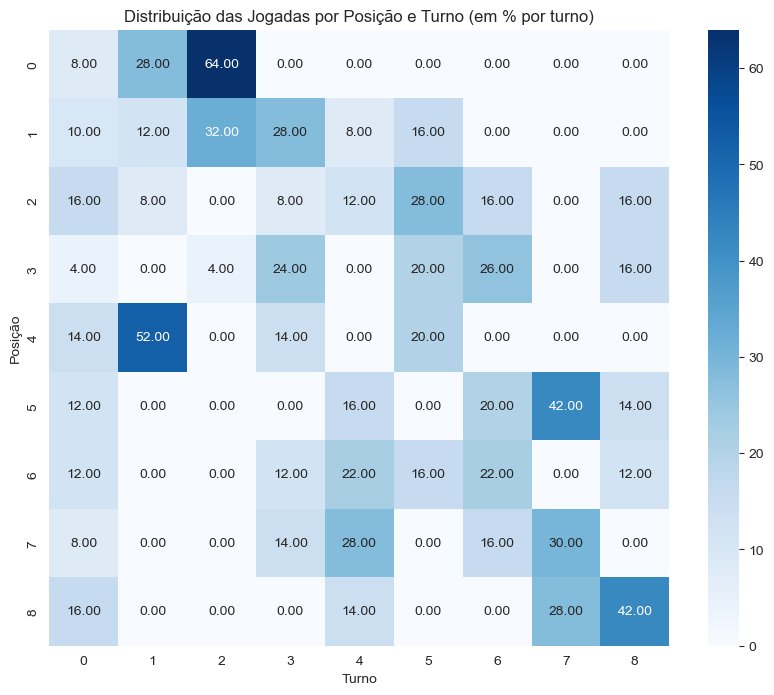

In [155]:
# Calcula a tabela pivot com as contagens
pivot_table = jogadas_df.pivot_table(index='POSITION_XY', columns='ROUND', aggfunc='size', fill_value=0)

# Calcula o total de jogadas por turno (por coluna)
total_jogadas_por_turno = pivot_table.sum(axis=0)

# Converte a contagem em porcentagem para cada turno
pivot_percentage = (pivot_table / total_jogadas_por_turno) * 100

# Agora, vamos plotar o heatmap com a tabela de porcentagens
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_percentage, annot=True, fmt='.2f', cmap='Blues') # Usando '.2f' para formatar como um float com 2 casas decimais
plt.title('Distribuição das Jogadas por Posição e Turno (em % por turno)')
plt.xlabel('Turno')
plt.ylabel('Posição')
plt.savefig("graphs/without_alpha_beta/Distribuição das Jogadas por Posição e Turno (em % por turno).png", dpi=500)
plt.show()


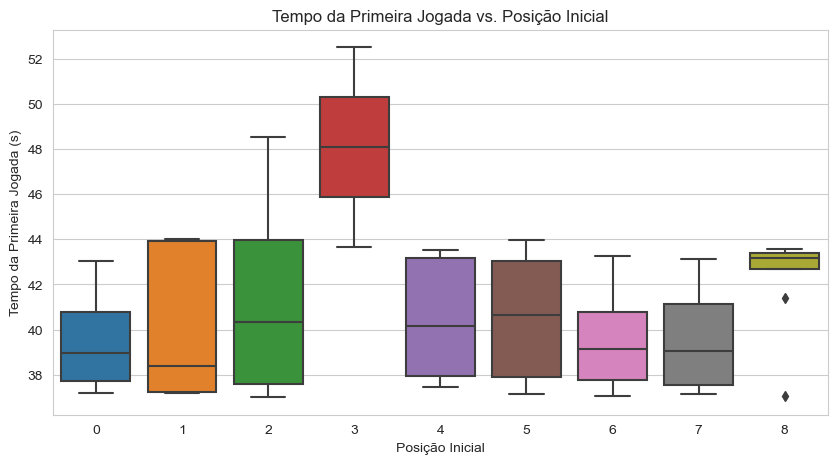

In [156]:
resultados_df['TIME_ROUND_1'] = resultados_df['TIME_ROUND_1'].astype(float)
plt.figure(figsize=(10, 5))
sns.boxplot(data=resultados_df, x='INITIAL_POSITION', y='TIME_ROUND_1')
plt.title('Tempo da Primeira Jogada vs. Posição Inicial')
plt.xlabel('Posição Inicial')
plt.ylabel('Tempo da Primeira Jogada (s)')
plt.savefig("graphs/without_alpha_beta/Tempo da Primeira Jogada vs. Posição Inicial.png", dpi=500)
plt.show()


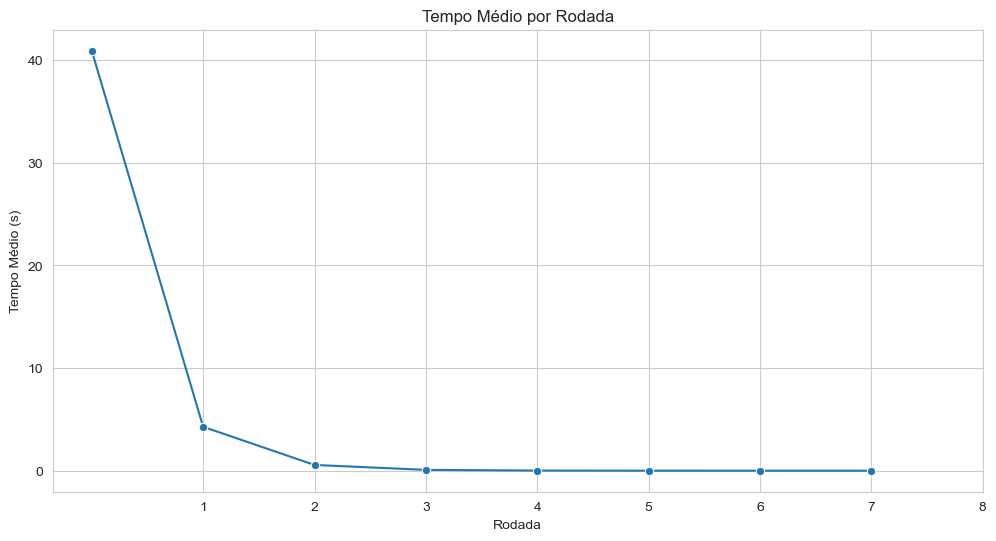

In [157]:
average_times = resultados_df[time_columns].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_times.index, y=average_times.values, marker='o')
plt.title('Tempo Médio por Rodada')
plt.xlabel('Rodada')
plt.ylabel('Tempo Médio (s)')
plt.xticks(ticks=range(1, 9), labels=range(1, 9))  # Para ajustar as marcações no eixo x
plt.savefig("graphs/without_alpha_beta/Tempo Médio por Rodada.png", dpi=500)
plt.show()


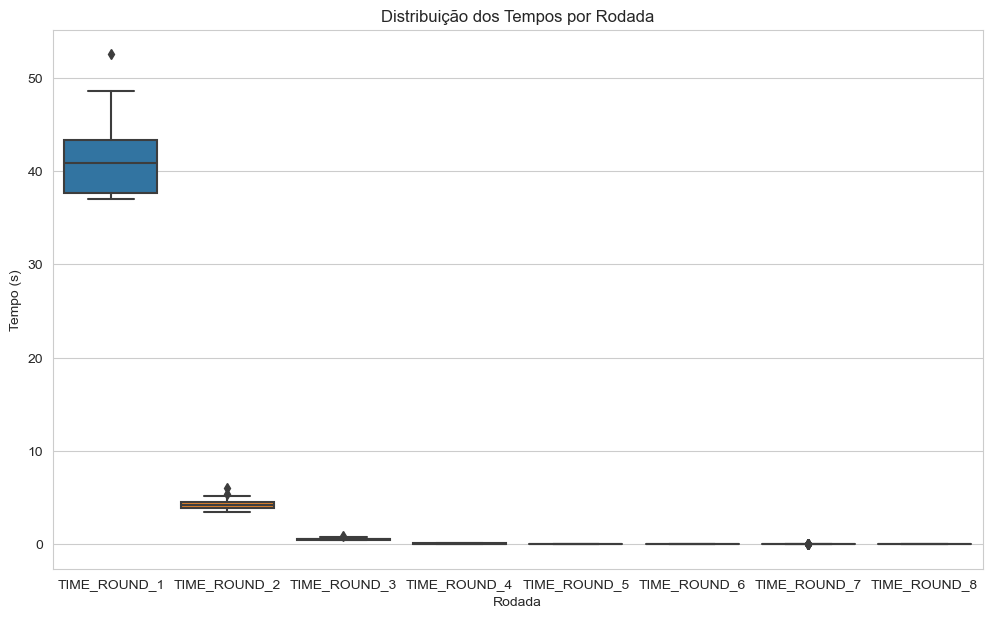

In [158]:
melted_df = resultados_df[time_columns].melt(var_name='Rodada', value_name='Tempo')

plt.figure(figsize=(12, 7))
sns.boxplot(data=melted_df, x='Rodada', y='Tempo')
plt.title('Distribuição dos Tempos por Rodada')
plt.xlabel('Rodada')
plt.ylabel('Tempo (s)')
plt.savefig("graphs/without_alpha_beta/Distribuição dos Tempos por Rodada.png", dpi=500)
plt.show()
